In [2]:
import numpy as np
import pandas as pd

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                      sheet_name = 'Canada by Citizenship',
                      skiprows = range(20),
                      skipfooter = 2)
print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
print(df_can.shape)

(195, 43)


In [6]:
#clean up the dataset
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
#rename some of the columns so that they make sence.
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
#for consistency, ensure that all column labels of type string
all(isinstance(column, str) for column in df_can.columns)

False

In [10]:
df_can.columns = list(map(str, df_can.columns))
all(isinstance(column,str) for column in df_can.columns)

True

In [11]:
#set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [12]:
#add total column
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [13]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [14]:
#create a list of years from 1980 - 2013 - this will come in handy when we start plotting the data
years = list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [15]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #optional: for ggplot-like style

#check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) #>=2.0.0

Matplotlib version:  3.1.1


In [17]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

#get the top 5 entries
df_top5 = df_can.head()

#transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head

<bound method NDFrame.head of Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255 

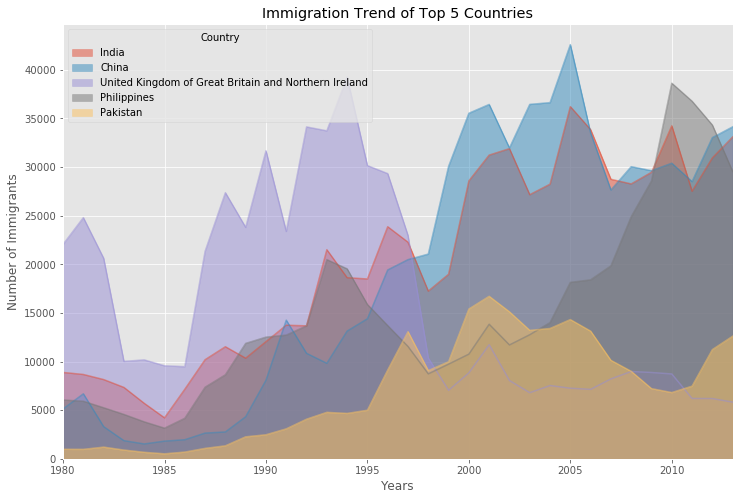

In [20]:
df_top5.index = df_top5.index.map(int) #let's change the index values of df_top5 to type intger for plotting
df_top5.plot(kind='area', stacked=False, figsize=(12,8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

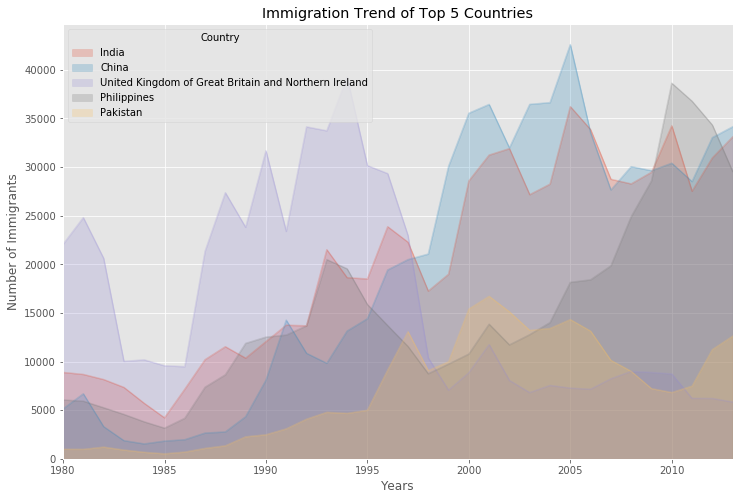

In [21]:
#option 1
df_top5.plot(kind='area', alpha=0.25, stacked=False, figsize=(12,8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Text(0.5, 0, 'Years')

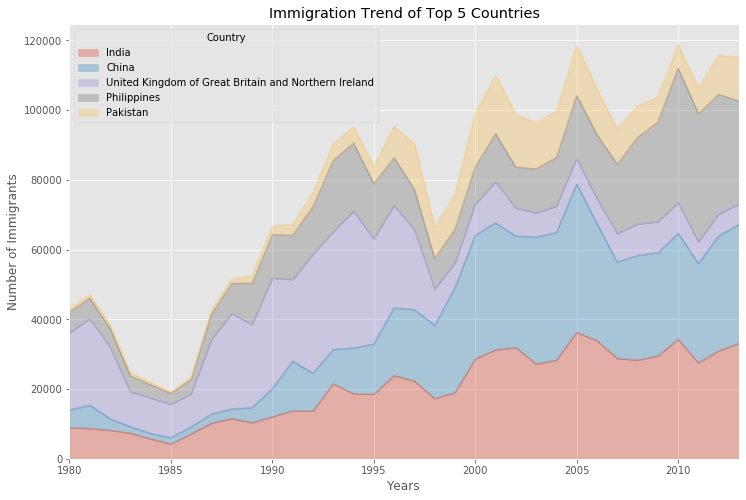

In [22]:
#option 2:Artist layer(object oriented method) - using Axes instance from Matplotlib, more flexible
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(12,8))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

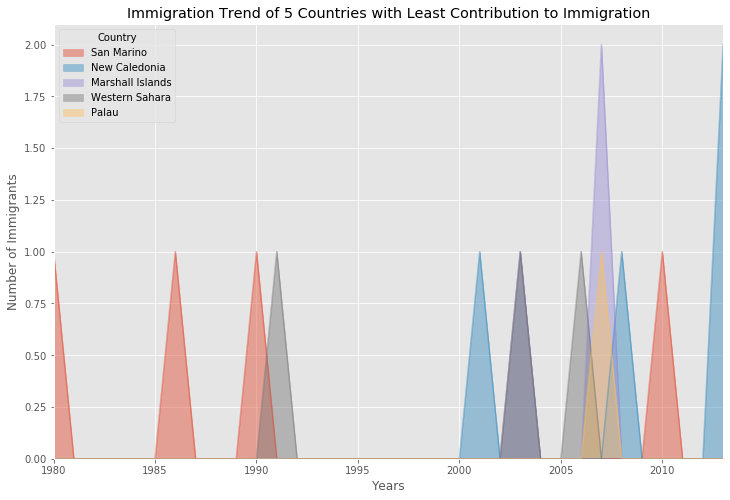

In [24]:
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()
df_least5.head()

df_least5.index = df_least5.index.map(int)
df_least5.plot(kind='area', alpha=0.45, stacked=False, figsize=(12,8))

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

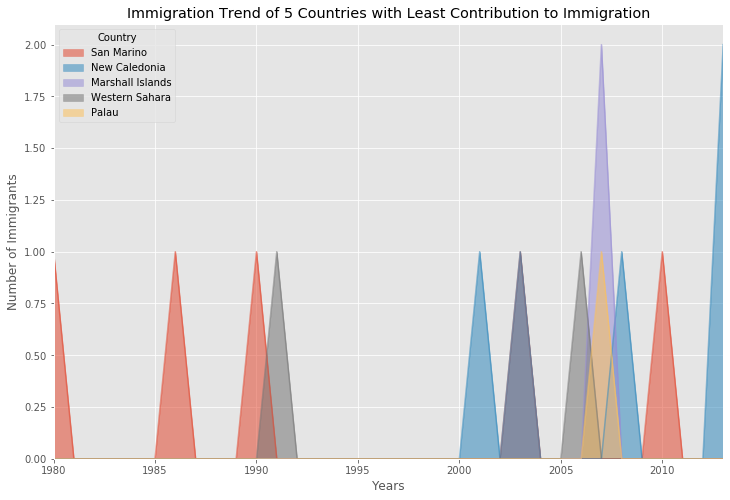

In [25]:
ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(12,8))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [26]:
#let's quickly view the 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [27]:
#np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


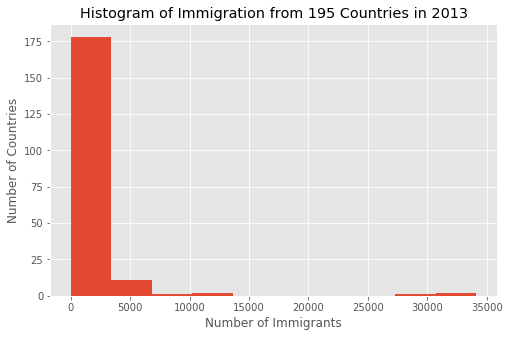

In [28]:
df_can['2013'].plot(kind='hist', figsize=(8,5))
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

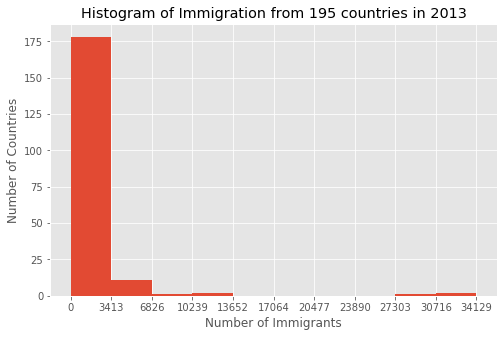

In [29]:
#'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])
df_can['2013'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

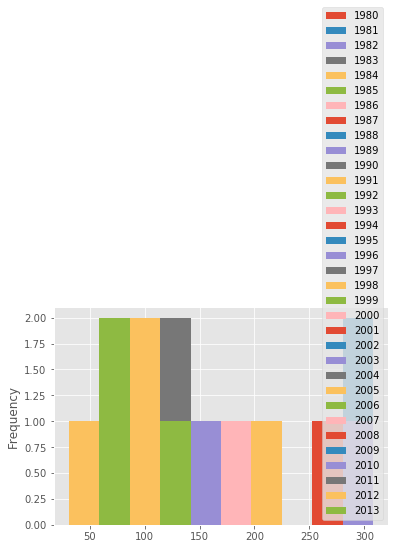

In [30]:
#the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013
df_can.loc[['Denmark','Norway','Sweden'],years]
#generate histogram
df_can.loc[['Denmark','Norway','Sweden'], years].plot.hist()

In [31]:
#transpose dataframe
df_t = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


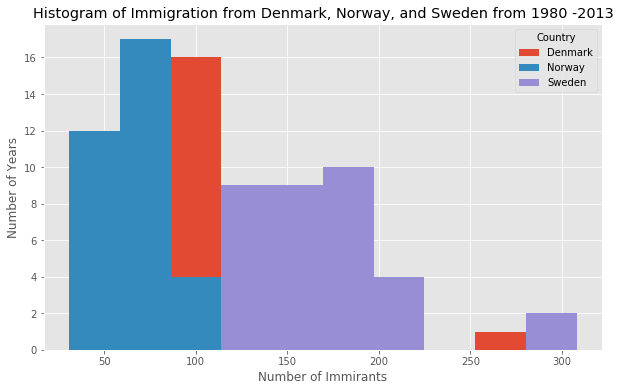

In [32]:
#generate histogram
df_t.plot(kind='hist', figsize=(10,6))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 -2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immirants')

plt.show()

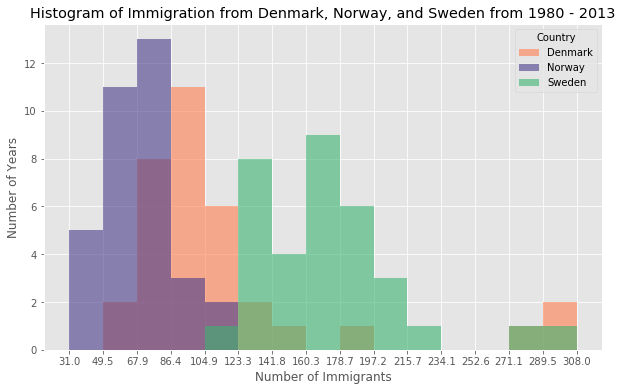

In [33]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t,15)
# un-stacked histogram
df_t.plot(kind='hist', figsize=(10,6), bins=15, alpha=0.6, xticks=bin_edges, color=['coral','darkslateblue','mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

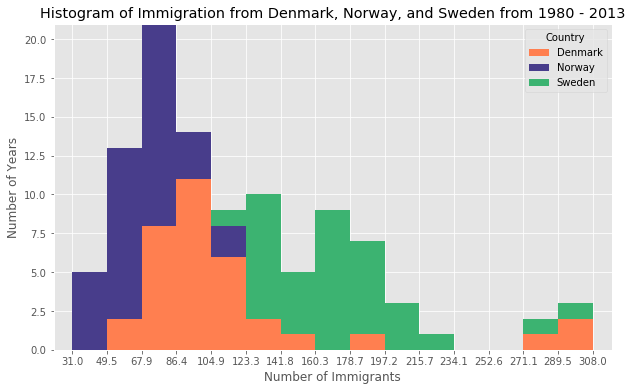

In [36]:
count, bin_edges = np.histogram(df_t,15)
xmin = bin_edges[0] - 10 # first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax = bin_edges[-1] + 10 # last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist', figsize=(10,6), bins=15, xticks=bin_edges, color=['coral','darkslateblue','mediumseagreen'], stacked=True, xlim=(xmin,xmax))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

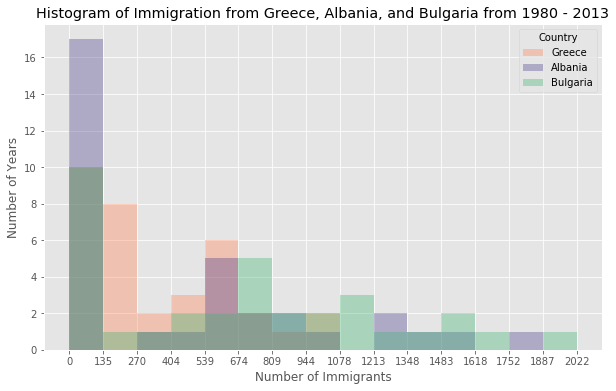

In [37]:
df_cof = df_can.loc[['Greece','Albania','Bulgaria'],years]
df_cof = df_cof.transpose()

count,bin_edges = np.histogram(df_cof,15)

#unstacked histogram
df_cof.plot(kind='hist',figsize=(10,6), bins=15, alpha=0.35, xticks=bin_edges, color=['coral','darkslateblue','mediumseagreen'])

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [38]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

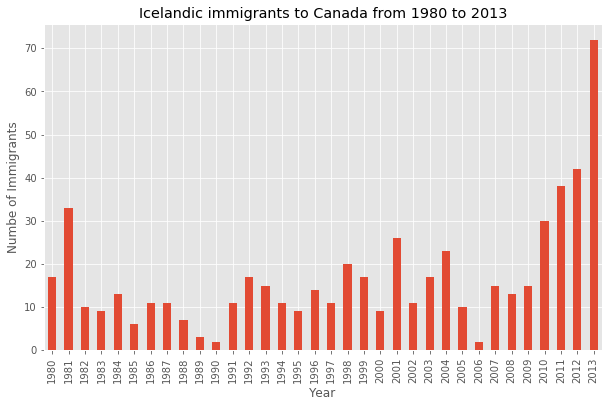

In [40]:
df_iceland.plot(kind='bar', figsize=(10,6))

plt.xlabel('Year')
plt.ylabel('Numbe of Immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.show()

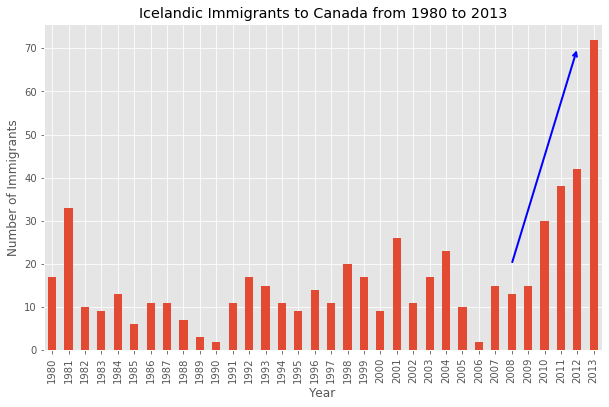

In [41]:
df_iceland.plot(kind='bar', figsize=(10,6), rot=90) #rotate the bars by 90 degrees
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# annotate arrow
plt.annotate('',                        # s:str. Will leave it blank for no text
             xy=(32,70),                # place head of the arrow at point (year 2012, pop 70)
             xytext=(28,20),            # place base of the arrow at point (year 2008, pop 20)
             xycoords='data',           # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )     
plt.show()

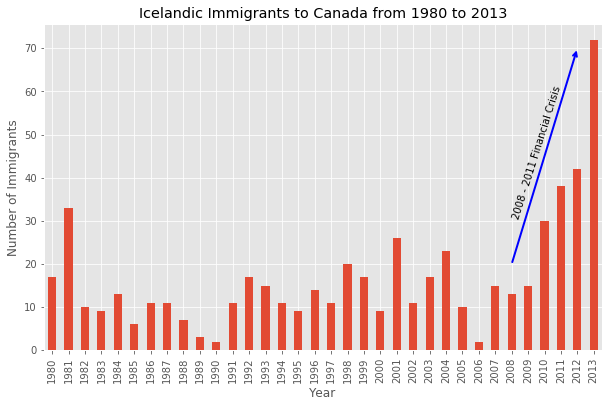

In [42]:
df_iceland.plot(kind='bar', figsize=(10,6), rot=90)
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

#Annotate arrow
plt.annotate('',
             xy=(32,70),
             xytext=(28,20),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
#Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',    # text to display
             xy=(28,30),                        # start the text at point (year 2008, pop 30)
             rotation=72.5,                     # based on trial and error to match the arrow
             va='bottom',                       # want the text to be vertically 'bottom' aligned
             ha='left'                          # want the text to be horizontally 'left' aligned
            )
plt.show()

In [43]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

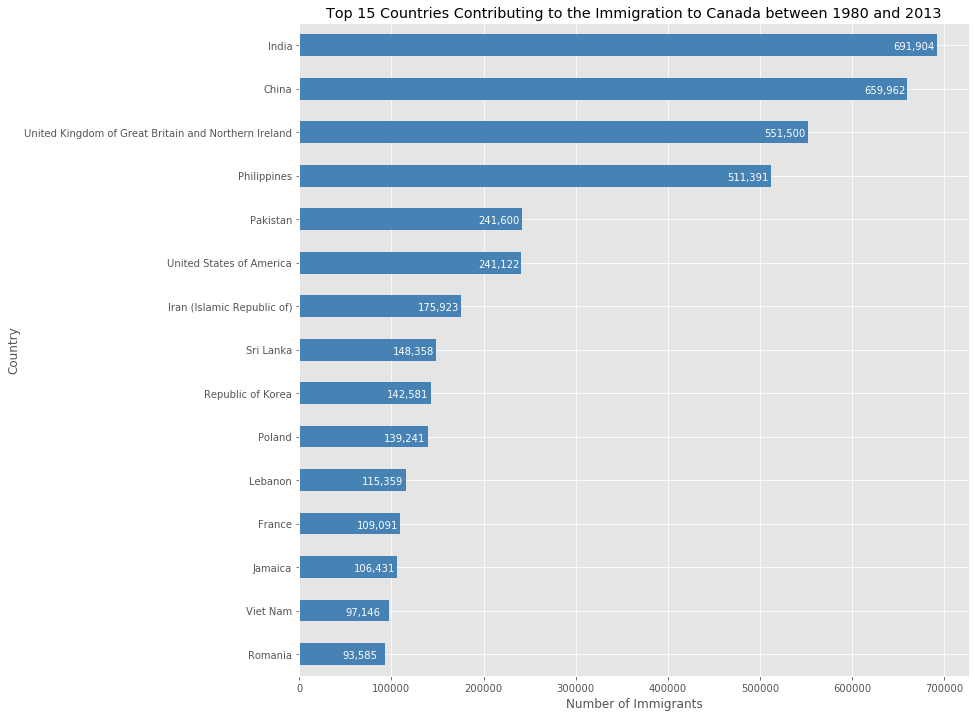

In [45]:
df_top15.plot(kind='barh', figsize=(12,12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between 1980 and 2013')

#annotate value labels to each country
for index, value in enumerate(df_top15):
    label = format(int(value), ',') #format int with commas
    #place text at the end of bar(subtrating 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white') 
    
plt.show()    